In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.shape

(7043, 21)

In [5]:
for col in df.iloc[:, :10].columns:
    print(f"{col} --> {df[col].unique().tolist()}\n")

customerID --> ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU', '9763-GRSKD', '7469-LKBCI', '8091-TTVAX', '0280-XJGEX', '5129-JLPIS', '3655-SNQYZ', '8191-XWSZG', '9959-WOFKT', '4190-MFLUW', '4183-MYFRB', '8779-QRDMV', '1680-VDCWW', '1066-JKSGK', '3638-WEABW', '6322-HRPFA', '6865-JZNKO', '6467-CHFZW', '8665-UTDHZ', '5248-YGIJN', '8773-HHUOZ', '3841-NFECX', '4929-XIHVW', '6827-IEAUQ', '7310-EGVHZ', '3413-BMNZE', '6234-RAAPL', '6047-YHPVI', '6572-ADKRS', '5380-WJKOV', '8168-UQWWF', '8865-TNMNX', '9489-DEDVP', '9867-JCZSP', '4671-VJLCL', '4080-IIARD', '3714-NTNFO', '5948-UJZLF', '7760-OYPDY', '7639-LIAYI', '2954-PIBKO', '8012-SOUDQ', '9420-LOJKX', '6575-SUVOI', '7495-OOKFY', '4667-QONEA', '1658-BYGOY', '8769-KKTPH', '5067-XJQFU', '3957-SQXML', '5954-BDFSG', '0434-CSFON', '1215-FIGMP', '0526-SXDJP', '0557-ASKVU', '5698-BQJOH', '5122-CYFXA', '8627-ZYGSZ', '3410-YOQBQ', '3170-NMYVV', '7410-OIEDU', '227

In [6]:
for col in df.iloc[:, 10:].columns:
    print(f"{col} --> {df[col].unique().tolist()}\n")

OnlineBackup --> ['Yes', 'No', 'No internet service']

DeviceProtection --> ['No', 'Yes', 'No internet service']

TechSupport --> ['No', 'Yes', 'No internet service']

StreamingTV --> ['No', 'Yes', 'No internet service']

StreamingMovies --> ['No', 'Yes', 'No internet service']

Contract --> ['Month-to-month', 'One year', 'Two year']

PaperlessBilling --> ['Yes', 'No']

PaymentMethod --> ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

MonthlyCharges --> [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15, 49.95, 18.95, 100.35, 103.7, 105.5, 113.25, 20.65, 106.7, 55.2, 90.05, 39.65, 19.8, 20.15, 59.9, 59.6, 55.3, 99.35, 30.2, 90.25, 64.7, 96.35, 95.5, 66.15, 20.2, 45.25, 99.9, 69.7, 74.8, 106.35, 97.85, 49.55, 69.2, 20.75, 79.85, 76.2, 84.5, 49.25, 80.65, 79.75, 64.15, 99.1, 69.5, 74.85, 95.45, 108.45, 24.95, 107.5, 100.5, 89.9, 42.1, 54.4, 94.4, 75.3, 78.9, 79.2, 49.05, 20.4, 111.6, 24.25, 64.5, 110.5, 55.65, 54.65, 74.75, 25

## Feature Engineering

Convert 'TotalCharges' data type to float

In [7]:
df[df['TotalCharges'] == ' '].reset_index(drop=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
5,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
7,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
8,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
9,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype(float)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df[df['tenure'] == 36].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
116,9560-BBZXK,Female,0,No,No,36,No,No phone service,DSL,Yes,No,No,No,No,No,Two year,No,Bank transfer (automatic),31.05,1126.35,No
338,7982-VCELR,Female,0,No,No,36,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.80,3565.65,No
436,4980-URKXC,Male,0,Yes,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.85,720.05,No
444,1910-FMXJM,Female,0,Yes,No,36,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.40,2937.65,No
838,6092-QZVPP,Male,0,No,No,36,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),79.20,2854.95,No


Categorize 'tenure' per year

In [11]:
# Categorize 'tenure'
tenure_bins = [-1, 12, 24, 36, 48, 60, 72]
tenure_labels = ['1st Year', '2nd Year', '3rd Year', '4th Year', '5th Year', '6th Year']
df['tenure'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=True)

df['tenure'] = df['tenure'].astype('object')

In [12]:
df['tenure'].unique()

array(['1st Year', '3rd Year', '4th Year', '2nd Year', '6th Year',
       '5th Year'], dtype=object)

### Data Distribution

In [13]:
def dist_col_plot(rows, cols, data):
    fig, axes = plt.subplots(rows, cols, figsize=(30, 10))

    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(data.columns):
            sns.histplot(data=data, x=data.columns[i], ax=ax)
            ax.set_title(data.columns[i])
        else:
            ax.set_visible(False)

    plt.tight_layout()
    plt.show()

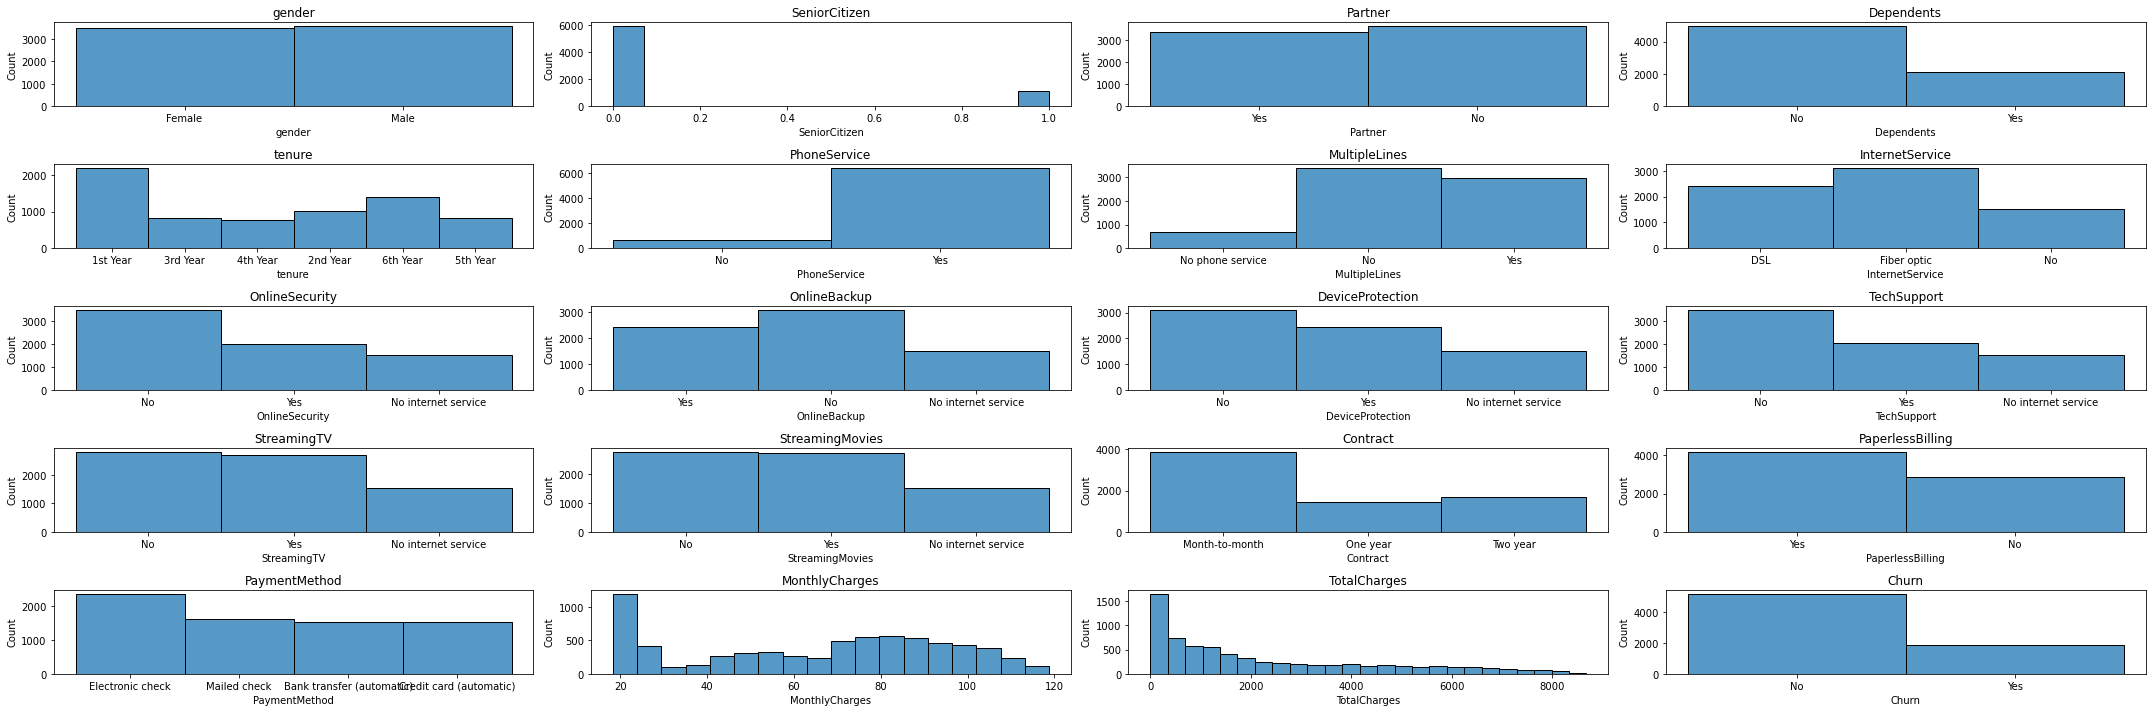

In [14]:
dist_col_plot(rows=5, cols=4, data=df.iloc[:, 1:])

### Checking Outliers

In [15]:
def plot_box(data, labels, title, figsize=(10, 5)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value', fontsize=14) 
    ax.set_title(title, fontsize=14)
    ax.set_yticklabels(labels, fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    plt.show()

In [16]:
df.select_dtypes(exclude='object')

,SeniorCitizen,MonthlyCharges,TotalCharges
0,0,29.85,29.85
1,0,56.95,1889.50
2,0,53.85,108.15
3,0,42.30,1840.75
4,0,70.70,151.65
...,...,...,...
7038,0,84.80,1990.50
7039,0,103.20,7362.90
7040,0,29.60,346.45
7041,1,74.40,306.60


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   object 
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


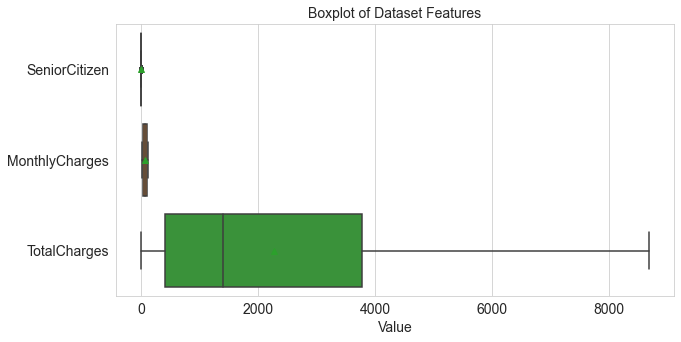

In [18]:
data=df.select_dtypes(exclude='object')

plot_box(data = data,
         labels = data.columns.tolist(),
         title='Boxplot of Dataset Features')

### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def print_mapping_classes(col):
    print(f"Column '{col}':")
    df[col] = le.fit_transform(df[col])
    
    for i in range(len(df[col].unique())):
        print(f"   --> {le.classes_[i]} : {i}")

In [20]:
df.iloc[:, 1:].select_dtypes(include='object')

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,1st Year,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,3rd Year,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,1st Year,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,4th Year,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,1st Year,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,2nd Year,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,6th Year,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,1st Year,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,1st Year,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [21]:
for i in df.iloc[:, 1:].select_dtypes(include='object').columns:
    print_mapping_classes(i)

Column 'gender':
   --> Female : 0
   --> Male : 1
Column 'Partner':
   --> No : 0
   --> Yes : 1
Column 'Dependents':
   --> No : 0
   --> Yes : 1
Column 'tenure':
   --> 1st Year : 0
   --> 2nd Year : 1
   --> 3rd Year : 2
   --> 4th Year : 3
   --> 5th Year : 4
   --> 6th Year : 5
Column 'PhoneService':
   --> No : 0
   --> Yes : 1
Column 'MultipleLines':
   --> No : 0
   --> No phone service : 1
   --> Yes : 2
Column 'InternetService':
   --> DSL : 0
   --> Fiber optic : 1
   --> No : 2
Column 'OnlineSecurity':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'OnlineBackup':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'DeviceProtection':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'TechSupport':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'StreamingTV':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'StreamingMovies':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int32  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,2,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,3,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Correlation Matrix

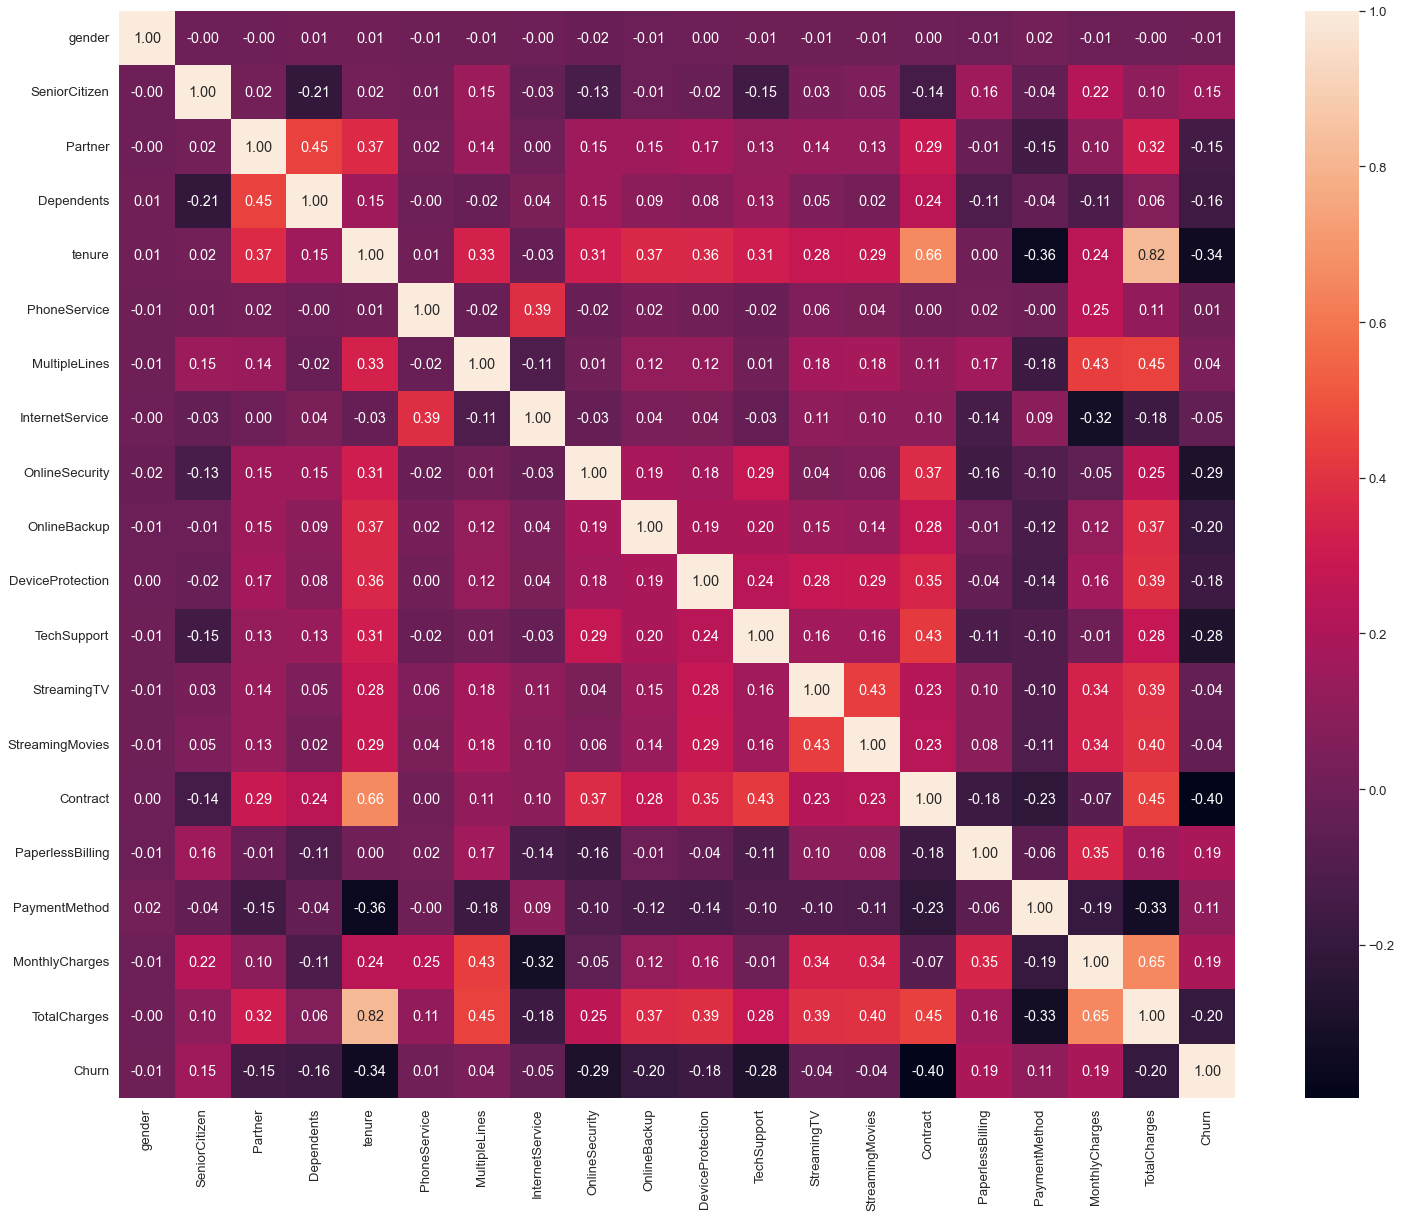

In [24]:
corr = df.corr()

plt.figure(figsize=(25,20))
sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

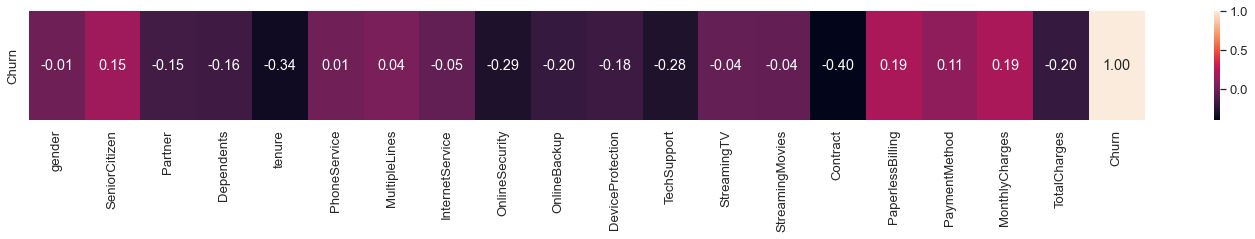

In [25]:
plt.figure(figsize=(25,2))
sns.set(font_scale=1.2)
sns.heatmap(corr.loc[['Churn'], :], annot=True, fmt='.2f')
plt.show()

### Scaling 'MonthlyCharges' & 'TotalCharges'

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = df[['MonthlyCharges', 'TotalCharges']].columns
df[cols] = scaler.fit_transform(df[cols])

In [27]:
df_id = df[['customerID']]
df.drop('customerID', axis=1, inplace=True)

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,0
1,1,0,0,0,2,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,1
3,1,0,0,0,3,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,1


### Checking Multicolinearity

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

X = df

# Tambahkan sebuah konstanta pada dataframe (prasyarat perhitungan)
X = add_constant(X)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

display(vif_data)

,feature,VIF
1,gender,1.001952
2,SeniorCitizen,1.151690
3,Partner,1.453590
4,Dependents,1.383266
5,tenure,6.483321
6,PhoneService,1.633690
7,MultipleLines,1.390619
8,InternetService,1.836867
9,OnlineSecurity,1.279301
10,OnlineBackup,1.221239


## Classification Modelling

### Splitting Data

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resample, y_resample = smote.fit_resample(X,y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,random_state=0,test_size=0.25)

In [34]:
y_resample.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [35]:
y_test.value_counts()

1    1297
0    1290
Name: Churn, dtype: int64

In [36]:
y_train.value_counts()

0    3884
1    3877
Name: Churn, dtype: int64

### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

print(f"Accuracy: {accuracy_rfc}")
print(f"F-1 Score: {f1_rfc}")

Accuracy: 0.8357170467723232
F-1 Score: 0.8420661464139726


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1290
           1       0.81      0.87      0.84      1297

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587



Text(0.5, 1.0, 'Confusion Matrix')

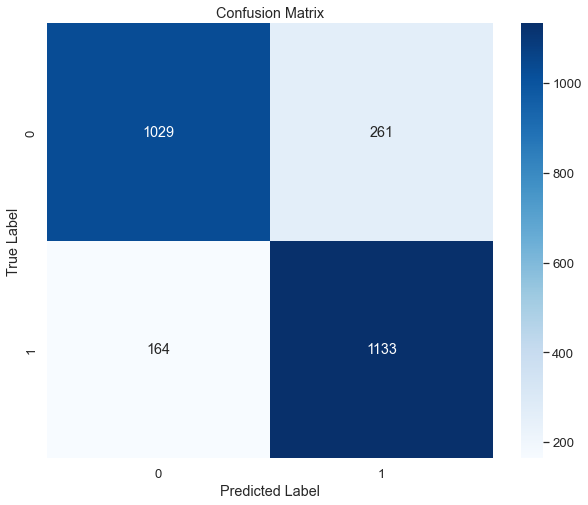

In [40]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rfc)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

ROC-AUC

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC score
roc_auc_rfc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_auc_rfc}")

ROC-AUC Score: 0.9115418407416042


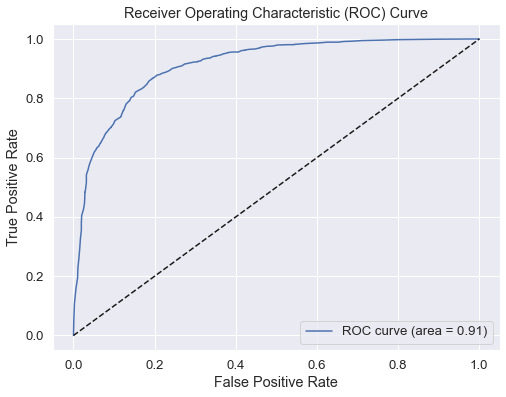

In [42]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_rfc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [43]:
y_train.shape

(7761,)

In [44]:
y_test.shape

(2587,)

### Logistic Regression Classifier

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

lrc = LogisticRegression()
lrc.fit(X_train, y_train)

y_pred_lrc = lrc.predict(X_test)

accuracy_lrc = accuracy_score(y_test, y_pred_lrc)
f1_lrc = f1_score(y_test, y_pred_lrc)

print(f"Accuracy: {accuracy_lrc}")
print(f"F-1 Score: {f1_lrc}")

Accuracy: 0.7835330498647082
F-1 Score: 0.7927461139896375


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lrc))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1290
           1       0.76      0.83      0.79      1297

    accuracy                           0.78      2587
   macro avg       0.79      0.78      0.78      2587
weighted avg       0.79      0.78      0.78      2587



Text(0.5, 1.0, 'Confusion Matrix')

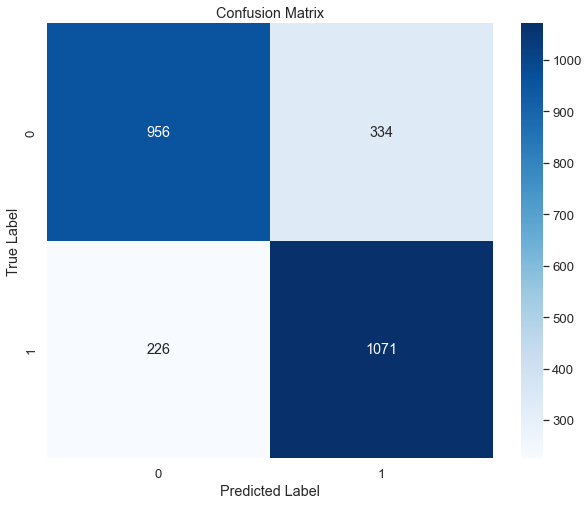

In [47]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_lrc)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

ROC-AUC

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC score
roc_auc_lrc = roc_auc_score(y_test, lrc.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_auc_lrc}")

ROC-AUC Score: 0.8664362601830105


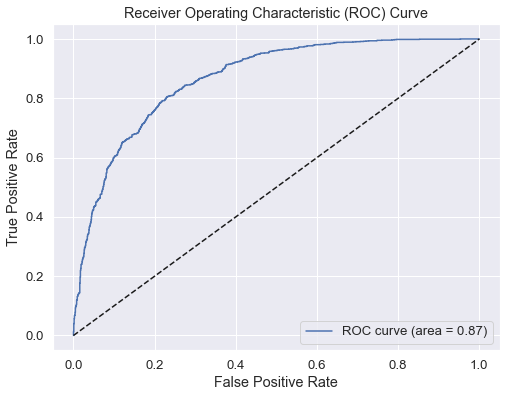

In [49]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lrc.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_lrc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### KNN Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print(f"F-1 Score: {f1_knn}")

Accuracy: 0.8028604561267878
F-1 Score: 0.8205489092188599


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1290
           1       0.75      0.90      0.82      1297

    accuracy                           0.80      2587
   macro avg       0.81      0.80      0.80      2587
weighted avg       0.81      0.80      0.80      2587



Text(0.5, 1.0, 'Confusion Matrix')

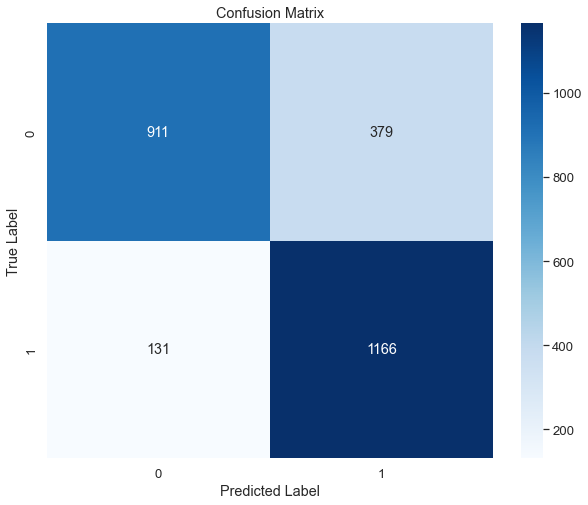

In [52]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

ROC-AUC

In [53]:
# Calculate ROC-AUC score
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_auc_knn}")

ROC-AUC Score: 0.862273403740295


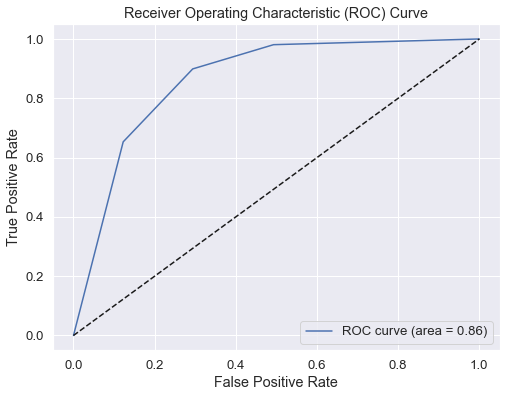

In [54]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)

accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
f1_dtree = f1_score(y_test, y_pred_dtree)

print(f"Decision Tree Accuracy: {accuracy_dtree}")
print(f"F-1 Score: {f1_dtree}")

Decision Tree Accuracy: 0.7700038654812524
F-1 Score: 0.7743648084945014


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1290
           1       0.76      0.79      0.77      1297

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587



Text(0.5, 1.0, 'Confusion Matrix')

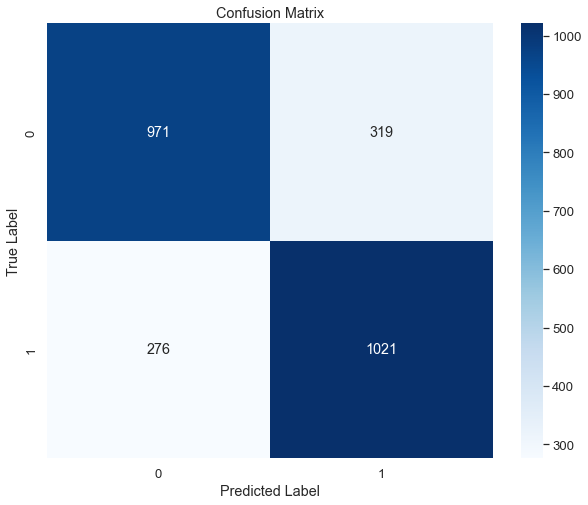

In [57]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_dtree)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

ROC-AUC

In [58]:
# Calculate ROC-AUC score
roc_auc_dtree = roc_auc_score(y_test, dtree.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_auc_dtree}")

ROC-AUC Score: 0.7707323997537548


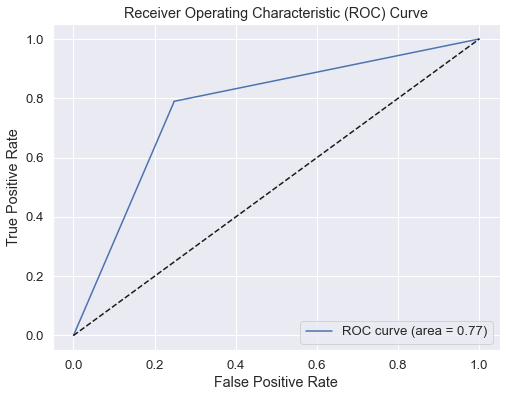

In [59]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_dtree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### SVC

In [66]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

svc = SVC(probability=True) 
svc.fit(X_train, y_train) 

y_pred_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print(f"SVC Accuracy: {accuracy_svc}")
print(f"F-1 Score: {f1_svc}")

SVC Accuracy: 0.7916505604947816
F-1 Score: 0.8016194331983804


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1290
           1       0.77      0.84      0.80      1297

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587



Text(0.5, 1.0, 'Confusion Matrix')

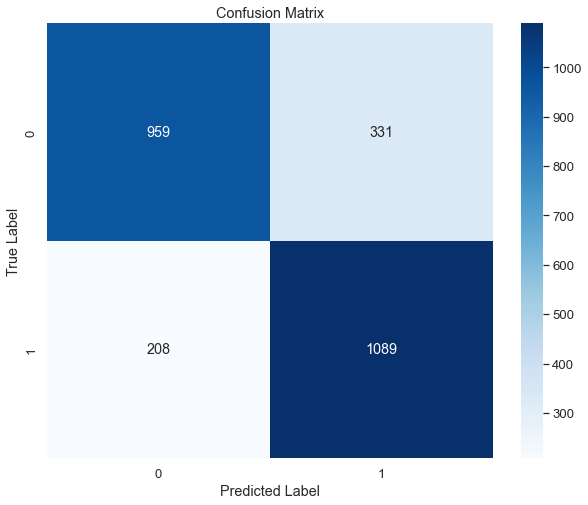

In [68]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

ROC-AUC

In [69]:
# Calculate ROC-AUC score
roc_auc_svc = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_auc_svc}")

ROC-AUC Score: 0.869441406226653


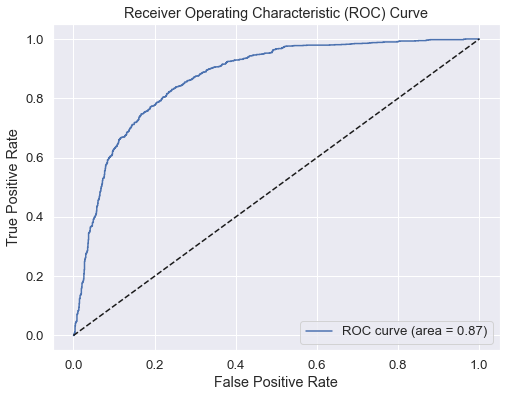

In [70]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = svc.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"SVC Accuracy: {accuracy_nb}")
print(f"F-1 Score: {f1_nb}")

SVC Accuracy: 0.7916505604947816
F-1 Score: 0.8016194331983804


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1290
           1       0.77      0.84      0.80      1297

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587



Text(0.5, 1.0, 'Confusion Matrix')

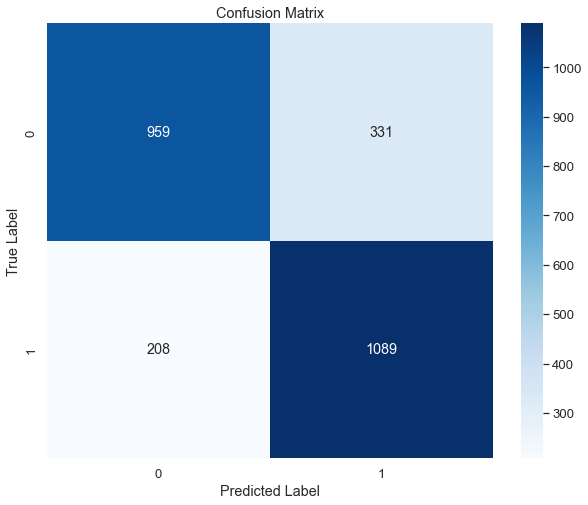

In [74]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [75]:
# Calculate ROC-AUC score
roc_auc_nb = roc_auc_score(y_test, nb.predict_proba(X_test)[:,1])
print(f"ROC-AUC Score: {roc_auc_nb}")

ROC-AUC Score: 0.8407030535583009


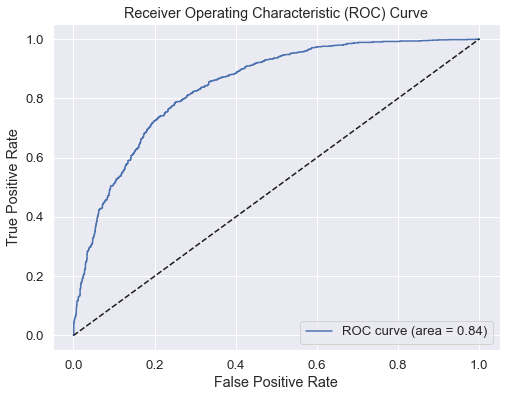

In [76]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Evaluation

In [77]:
pd.DataFrame({
    'Model Name':['Random Forest', 'Logistic Regression', 'KNN', 'Decision Tree', 'SVC', 'Naive Bayes'],
    'Accuracy Score':[accuracy_rfc, accuracy_lrc, accuracy_knn, accuracy_dtree, accuracy_svc, accuracy_nb],
    'F-1 Score':[f1_rfc, f1_lrc, f1_knn, f1_dtree, f1_svc, f1_nb],
    'ROC-AUC Score':[roc_auc_rfc, roc_auc_lrc, roc_auc_knn, roc_auc_dtree, roc_auc_svc, roc_auc_nb],
})

,Model Name,Accuracy Score,F-1 Score,ROC-AUC Score
0,Random Forest,0.835717,0.842066,0.911542
1,Logistic Regression,0.783533,0.792746,0.866436
2,KNN,0.802860,0.820549,0.862273
3,Decision Tree,0.770004,0.774365,0.770732
4,SVC,0.791651,0.801619,0.869441
5,Naive Bayes,0.791651,0.801619,0.840703
